### **예제 1: PCA를 사용하여 2차원으로 차원 축소하기**

📌 **문제:** `PCA(n_components=2)`를 사용하여 `iris` 데이터셋의 차원을 2개로 축소하고 시각화하시오.

💡 **힌트:** `fit_transform()`을 사용하면 데이터를 변환할 수 있음.

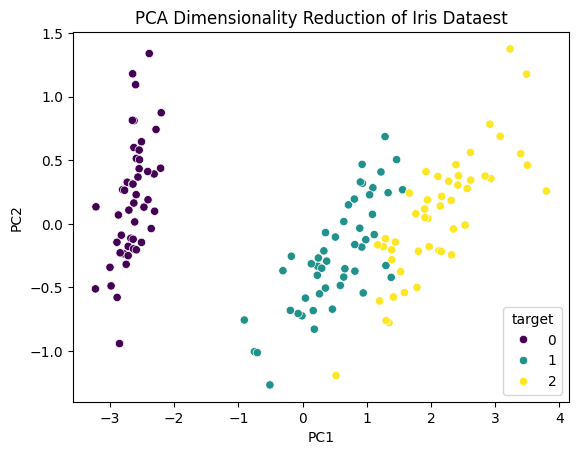

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["target"], palette="viridis")
plt.title("PCA Dimensionality Reduction of Iris Dataest")
plt.show()

### **예제 2: 주성분(PCA)의 설명 분산 비율 확인하기**

📌 **문제:** `explained_variance_ratio_`를 사용하여 각 주성분이 데이터의 분산을 얼마나 설명하는지 확인하시오.

💡 **힌트:** `explained_variance_ratio_`는 각 차원이 전체 분산에서 차지하는 비율을 나타냄.

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.92461872 0.05306648]
Cumulative Variance: [0.92461872 0.97768521]


### **예제 3: 최적의 주성분 개수 선택하기 (엘보우 방법)**

📌 **문제:** `PCA(n_components=n)`을 변경하면서 누적 분산이 95% 이상이 되는 최소 차원을 찾으시오.

💡 **힌트:** `np.argmax(cumsum >= 0.95) + 1`을 사용하면 최소 차원을 찾을 수 있음.

In [ ]:
import numpy as np

pca_all = PCA().fit(df)
cumsum = np.cumsum(pca_all.explained_variance_ratio_)
optimal_n = np.argmax(cumsum>=0.95)+1

print(f"Optimal number of components: {optimal_n}")

Optimal number of components: 2


📌 **문제:** `TSNE(n_components=2)`를 사용하여 `iris` 데이터를 2차원으로 축소하고 시각화하시오.

💡 **힌트:** `perplexity` 값을 조정하면 더 나은 결과를 얻을 수 있음.

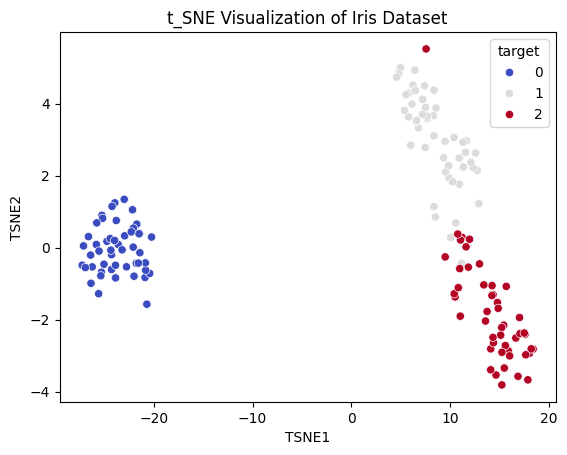

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df), columns=["TSNE1", "TSNE2"])
df_tsne["target"] = iris.target

sns.scatterplot(x=df_tsne["TSNE1"], y=df_tsne["TSNE2"], hue=df_tsne["target"], palette="coolwarm")
plt.title("t_SNE Visualization of Iris Dataset")
plt.show()

### **예제 5: LDA(Linear Discriminant Analysis)를 사용한 차원 축소**

📌 **문제:** `LDA(n_components=2)`를 사용하여 `iris` 데이터를 차원 축소하고 시각화하시오.

💡 **힌트:** `LinearDiscriminantAnalysis()`는 지도 학습 방식의 차원 축소 기법임.

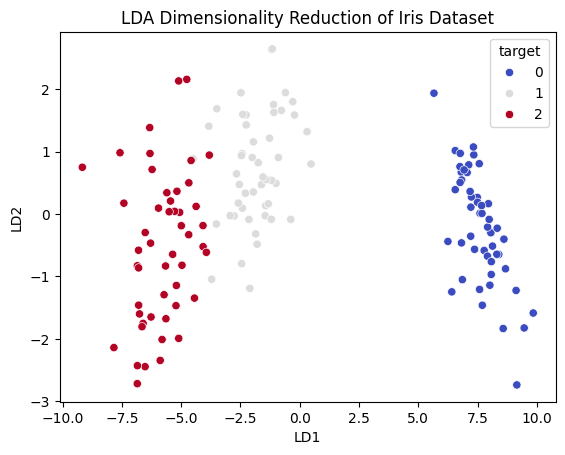

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
df_lda = pd.DataFrame(lda.fit_transform(df, iris.target), columns=["LD1", "LD2"])
df_lda["target"] = iris.target

sns.scatterplot(x=df_lda["LD1"], y=df_lda["LD2"], hue=df_lda["target"], palette="coolwarm")
plt.title("LDA Dimensionality Reduction of Iris Dataset")
plt.show()

1. **PCA를 적용한 후 K-Means 군집화 수행하기**
    - `PCA(n_components=2)`를 적용한 후 `KMeans`를 사용하여 군집화하라.

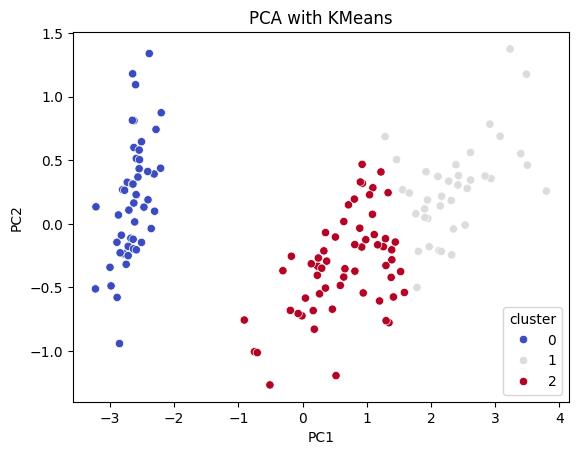

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

km = KMeans(n_clusters=3)
df_pca["cluster"]=km.fit_predict(df_pca[["PC1", "PC2"]])

sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["cluster"], palette="coolwarm")
plt.title("PCA with KMeans")
plt.show()

2. **UMAP을 사용하여 차원 축소 및 시각화하기**
    - `UMAP(n_components=2)`를 사용하여 데이터를 시각화하라.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


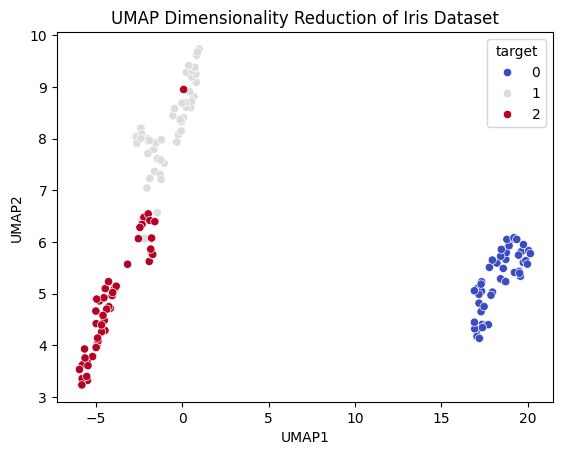

In [ ]:
import umap
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

umap = umap.UMAP(n_components=2)
df_umap = pd.DataFrame(umap.fit_transform(df), columns=["UMAP1", "UMAP2"])
df_umap["target"] = iris.target

sns.scatterplot(x=df_umap["UMAP1"], y=df_umap["UMAP2"], hue=df_umap["target"], palette="coolwarm")
plt.title("UMAP Dimensionality Reduction of Iris Dataset")
plt.show()

3. **PCA를 적용한 후 로지스틱 회귀 모델 학습하기**
    - `PCA(n_components=n)`을 적용한 후 `LogisticRegression`을 학습하라.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns = ["PC1", "PC2"])
df_pca["target"] = iris.target

model = LogisticRegression()
X = df_pca[["PC1", "PC2"]]
Y = df_pca["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"accuracy: {accuracy:.4f}")

accuracy: 0.9667


4. **차원 축소 후 실루엣 점수 계산하여 군집화 평가하기**
    - `silhouette_score()`를 사용하여 차원 축소된 데이터의 군집 품질을 평가하라.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

score = silhouette_score(df_pca[["PC1", "PC2"]], df_pca["target"])
print(f"Silhouette Score of PCA Dimensionality Reduction: {score:.4f}")

Silhouette Score of PCA Dimensionality Reduction: 0.5344


5. **원본 데이터와 차원 축소된 데이터의 분산 비교하기**
    - `explained_variance_ratio_`를 사용하여 PCA 전후의 분산을 비교하라.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

variance_before_pca = np.var(df)
print(f"Explained Variance Ratio Before PCA: {variance_before_pca}")

pca = PCA(n_components=2)
pca.fit(df)
print(f"Explained Variance Ratio After PCA: {pca.explained_variance_ratio_}")
print(f"Cumulative Variance Ratio After PCA: {pca.explained_variance_ratio_.cumsum()}")

Explained Variance Ratio Before PCA: sepal length (cm)    0.681122
sepal width (cm)     0.188713
petal length (cm)    3.095503
petal width (cm)     0.577133
dtype: float64
Explained Variance Ratio After PCA: [0.92461872 0.05306648]
Cumulative Variance Ratio After PCA: [0.92461872 0.97768521]


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


6. **차원 축소 후 랜덤 포레스트 모델 학습 및 성능 비교하기**
    - `PCA(n_components=n)`을 적용한 후 `RandomForestClassifier`을 학습하라.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

model = RandomForestClassifier()
X = df_pca[["PC1", "PC2"]]
Y = df_pca["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Random Forest Accuracy Score with PCA: {accuracy:.4f}")

Random Forest Accuracy Score with PCA: 1.0000


7. **다양한 차원 축소 기법(PCA, t-SNE, UMAP) 성능 비교하기**
    - PCA, t-SNE, UMAP을 적용한 후 차원 축소된 데이터를 비교하라.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

tsne = TSNE(n_components=2)
df_tsne = pd.DataFrame(tsne.fit_transform(df), columns=["TSNE1", "TSNE2"])
df_tsne["target"] = iris.target

umap = umap.UMAP(n_components=2)
df_umap = pd.DataFrame(umap.fit_transform(df), columns=["UMAP1", "UMAP2"])
df_umap["target"] = iris.target

model_pca = LogisticRegression()
model_tsne = LogisticRegression()
model_umap = LogisticRegression()

X_pca = df_pca[["PC1", "PC2"]]
Y_pca = df_pca["target"]
X_tsne = df_tsne[["TSNE1", "TSNE2"]]
Y_tsne = df_tsne["target"]
X_umap = df_umap[["UMAP1", "UMAP2"]]
Y_umap = df_umap["target"]

X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y_pca, test_size=0.2, random_state=0)
X_tsne_train, X_tsne_test, Y_tsne_train, Y_tsne_test = train_test_split(X_tsne, Y_tsne, test_size=0.2, random_state=0)
X_umap_train, X_umap_test, Y_umap_train, Y_umap_test = train_test_split(X_umap, Y_umap, test_size=0.2, random_state=0)

model_pca.fit(X_pca_train, Y_pca_train)
model_tsne.fit(X_tsne_train, Y_tsne_train)
model_umap.fit(X_umap_train, Y_umap_train)

Y_pca_pred = model_pca.predict(X_pca_test)
Y_tsne_pred = model_tsne.predict(X_tsne_test)
Y_umap_pred = model_umap.predict(X_umap_test)

pca_accuracy = accuracy_score(Y_pca_test, Y_pca_pred)
tsne_accuracy = accuracy_score(Y_tsne_test, Y_tsne_pred)
umap_accuracy = accuracy_score(Y_umap_test, Y_umap_pred)

print(f"PCA Accuracy Score: {pca_accuracy:.4f}")
print(f"t-SNE Accuracy Score: {tsne_accuracy:.4f}")
print(f"UMAP Accuracy Score: {umap_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


PCA Accuracy Score: 1.0000
t-SNE Accuracy Score: 1.0000
UMAP Accuracy Score: 1.0000


8. **PCA 적용 후 원본 데이터로 복원하기 (Inverse Transform)**
    - `inverse_transform()`을 사용하여 축소된 데이터를 원래 차원으로 변환하라.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
df_pca["target"] = iris.target

inversed_df = pd.DataFrame(pca.inverse_transform(df_pca[["PC1", "PC2"]]))

print(df_pca.head())
print(inversed_df.head())

        PC1       PC2  target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0
          0         1         2         3
0  5.083039  3.517414  1.403214  0.213532
1  4.746262  3.157500  1.463562  0.240246
2  4.704119  3.195682  1.308217  0.175180
3  4.642212  3.056967  1.461330  0.239732
4  5.071755  3.526555  1.363738  0.197000


9. **고차원 데이터에서 커널 PCA(Kernel PCA) 적용하기**
    - `KernelPCA(kernel="rbf", n_components=2)`를 사용하여 데이터를 차원 축소하라.

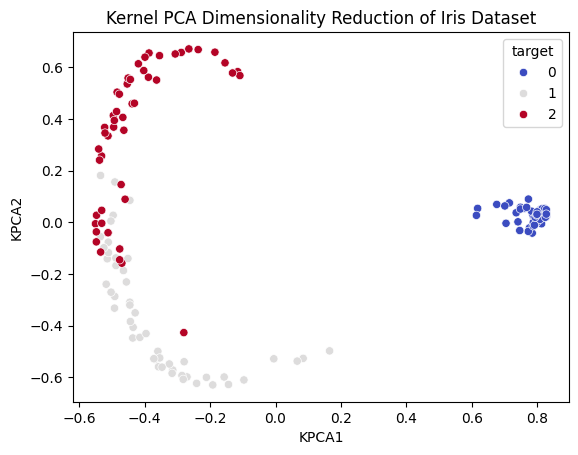

In [ ]:
from sklearn.decomposition import KernelPCA
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

kpca = KernelPCA(kernel = "rbf", n_components=2)
df_kpca = pd.DataFrame(kpca.fit_transform(df), columns=["KPCA1", "KPCA2"])
df_kpca["target"] = iris.target

sns.scatterplot(x=df_kpca["KPCA1"], y=df_kpca["KPCA2"], hue=df_kpca["target"], palette="coolwarm")
plt.title("Kernel PCA Dimensionality Reduction of Iris Dataset")
plt.show()